In [2]:
import pandas as pd

In [4]:
dftrain = pd.read_csv('C:/Users/Srinivasa Rao/OneDrive/Documents/GUVI Files/Datasets/Mobile Price Prediction train.csv')
dftrain

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
dftest = pd.read_csv('C:/Users/Srinivasa Rao/OneDrive/Documents/GUVI Files/Datasets/Mobile Price Prediction test.csv')
dftest

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [7]:
dfprice = dftrain[['price_range']]
dfprice

,price_range
0,1
1,2
2,2
3,2
4,1
...,...
1995,0
1996,2
1997,3
1998,0


In [112]:
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [113]:
X = dftrain
y = dfprice

In [114]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)
model = SVC(kernel = 'rbf',gamma = 'scale')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score = accuracy_score(y_test,y_pred)
classification_report = classification_report(y_test,y_pred)

c:\Users\Srinivasa Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [115]:
print(f'accuracy: {accuracy_score}')
print(f'Classification Report: {classification_report}')

accuracy: 0.9525
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.97      0.97        98
           1       0.93      0.97      0.95       102
           2       0.98      0.89      0.93       108
           3       0.92      0.99      0.95        92

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



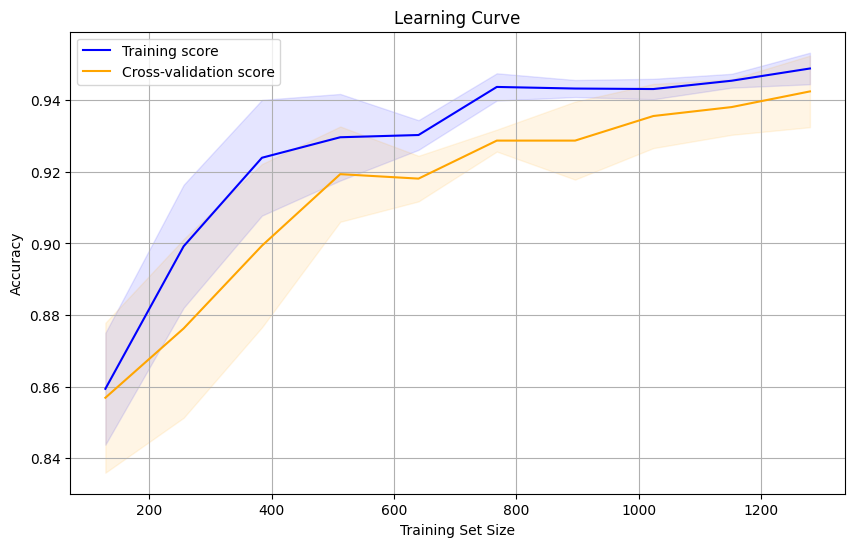

In [116]:
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='orange')

# Plot the variance as a shaded region
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.1)

# Label the plot
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

In [103]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score
import matplotlib.pyplot as plt

In [104]:
X = dftrain
y = dfprice

c:\Users\Srinivasa Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Srinivasa Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Srinivasa Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Srinivasa Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ne

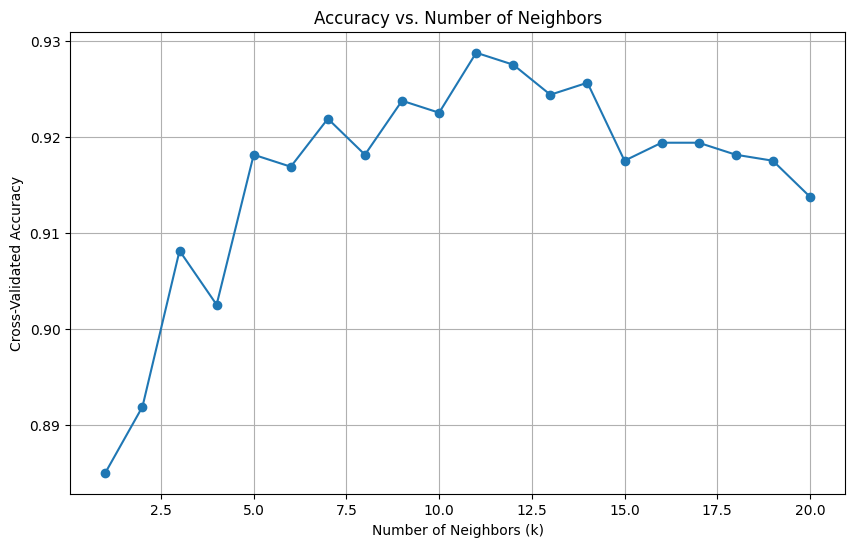

In [105]:
# List to hold accuracy scores
accuracy_scores = []

# Range of neighbors to test
neighbors_range = range(1, 21)

# Loop over different values of n_neighbors
for k in neighbors_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(scores.mean())

# Plotting the accuracy vs. number of neighbors
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, accuracy_scores, marker='o')
plt.title("Accuracy vs. Number of Neighbors")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True)
plt.show()

In [107]:
print(accuracy_scores)

[0.885, 0.8918750000000001, 0.9081250000000001, 0.9025000000000001, 0.9181250000000001, 0.9168749999999999, 0.921875, 0.9181250000000001, 0.9237500000000001, 0.9225, 0.92875, 0.9275, 0.9243750000000001, 0.9256249999999999, 0.9175000000000001, 0.9193749999999999, 0.9193749999999999, 0.9181250000000001, 0.9175000000000001, 0.91375]


In [96]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,accuracy_score
import matplotlib.pyplot as plt

In [97]:
X = dftrain
y = dfprice

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Create an MLP Classifier
mlp = MLPClassifier(activation='logistic',learning_rate='adaptive',hidden_layer_sizes=(64,32,16,), max_iter=1325, alpha=1e-4,
                    solver='adam', verbose=10, random_state=1,n_iter_no_change=900,
                    learning_rate_init=.01) # alpha is a regularization parameter used to control L2 regularization term

In [99]:
# Train the classifier
mlp.fit(X_train, y_train)

# Predictions on the test set
y_pred = mlp.predict(X_test)

c:\Users\Srinivasa Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.38202589
Iteration 2, loss = 1.30847154
Iteration 3, loss = 1.17745303
Iteration 4, loss = 1.08737213
Iteration 5, loss = 1.02903008
Iteration 6, loss = 0.99898800
Iteration 7, loss = 1.00058264
Iteration 8, loss = 0.97144411
Iteration 9, loss = 0.96300853
Iteration 10, loss = 0.96057857
Iteration 11, loss = 0.92744513
Iteration 12, loss = 0.94678438
Iteration 13, loss = 0.95747260
Iteration 14, loss = 0.99708184
Iteration 15, loss = 0.96959629
Iteration 16, loss = 0.92610213
Iteration 17, loss = 0.95431883
Iteration 18, loss = 0.96209500
Iteration 19, loss = 0.95722222
Iteration 20, loss = 0.92373674
Iteration 21, loss = 1.02011060
Iteration 22, loss = 0.99535824
Iteration 23, loss = 1.02418713
Iteration 24, loss = 0.99365615
Iteration 25, loss = 0.96214644
Iteration 26, loss = 0.96693392
Iteration 27, loss = 0.95094491
Iteration 28, loss = 0.93776288
Iteration 29, loss = 0.93924003
Iteration 30, loss = 0.98361770
Iteration 31, loss = 0.97760398
Iteration 32, los

c:\Users\Srinivasa Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1325) reached and the optimization hasn't converged yet.
  warnings.warn(


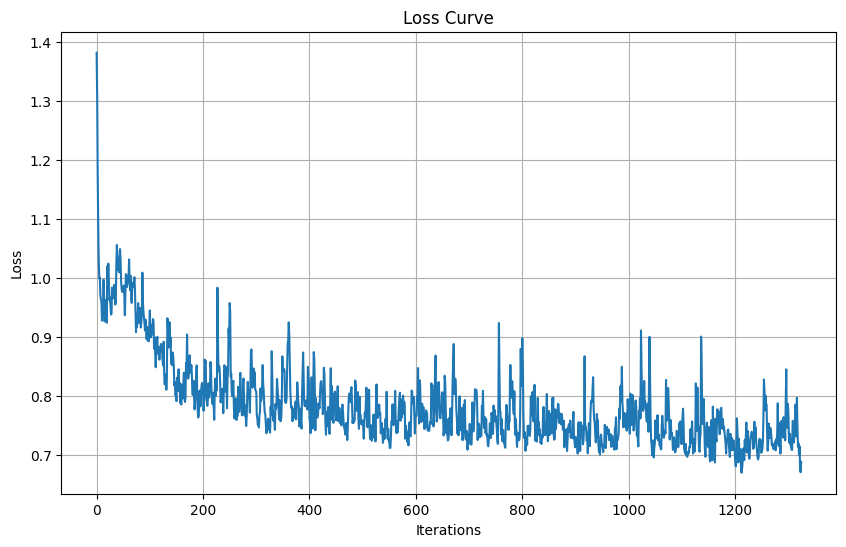

In [100]:
# Plotting the loss curve
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [101]:
classification_report = classification_report(y_test,y_pred)
print(f'Classification Report: {classification_report}')
accuracy_score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy_score}')

Classification Report:               precision    recall  f1-score   support

           0       0.96      0.70      0.81       105
           1       0.50      0.85      0.63        91
           2       0.00      0.00      0.00        92
           3       0.64      0.96      0.77       112

    accuracy                           0.65       400
   macro avg       0.53      0.63      0.55       400
weighted avg       0.54      0.65      0.57       400

Accuracy: 0.6475


c:\Users\Srinivasa Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Srinivasa Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Srinivasa Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.